In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris, load_boston
from numpy import array, linalg as la, cov, dot, argsort, cumsum
import matplotlib
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from matplotlib import rcParams
rcParams['figure.figsize']=10,10
from matplotlib import pyplot as plt

# PCA y SVD

Cargamos los conjuntos de datos.

In [2]:
iris_data   = load_iris()
iris_d      = iris_data['data']
iris_t      = iris_data['target']
iris_e      = iris_data['target_names']
breast_data = load_breast_cancer()
breast_d    = breast_data['data']
breast_t    = breast_data['target']
breast_n    = breast_data['target_names']


In [3]:
print(iris_d)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## PCA

Definimos la función ```pca``` que recibe los datos y el número de dimensiones a la cual queremos reducir la dimensión. 

El algoritmo es
1. D      <- Centrar datos en la media
1. C      <- Obtener la función de covarianza de D 
1. E,V    <- Obtener eigenvalores y eigenvectores de C
1. E', V' <- Ordenar E y V usando la permutación que ordena E de mayor a menor
1. Regresar los datos en el nuevo espacio

In [4]:
def pca(datos, dimens=2):
    m, n = datos.shape
    D = datos[:]; D -= datos.mean(axis=0)
    R = cov(D, rowvar=False)
    evals, evecs = la.eigh(R)
    idx = argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dimens]
    return dot(evecs.T, D.T).T, evals, evecs

## Iris

Conjunto de 3 variedades de Iris con 150 ejemplares.
1. Setosa
1. Virginica
1. Versicolor

In [5]:
#Atributos
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<Figure size 720x720 with 0 Axes>

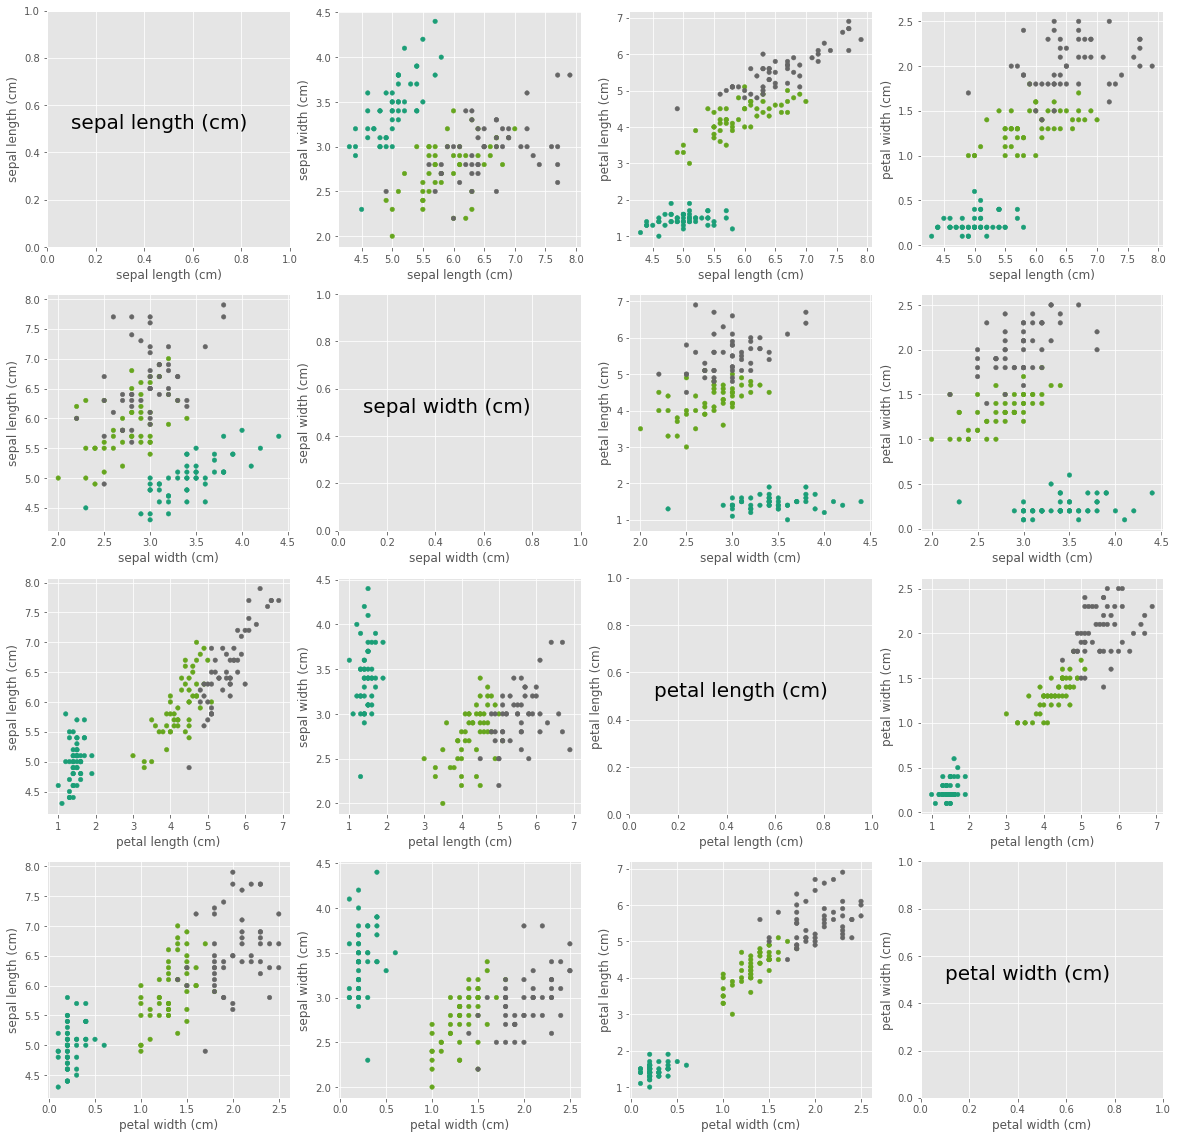

In [6]:
plt.clf()
f, ax = plt.subplots(4,4)
f.set_size_inches(20,20)
cuadro = 1
for i in range(4):
    xatr = iris_data.feature_names[i]
    for j in range(4):
        yatr = iris_data.feature_names[j]
        plt.subplot(4,4,cuadro)
        if(i==j):
            plt.text(.1,.5, xatr, size=20)
        else:    
            plt.scatter(iris_d[:,i], iris_d[:,j], c=iris_t, s=20, cmap='Dark2')
        plt.xlabel(xatr); plt.ylabel(yatr)
        cuadro += 1

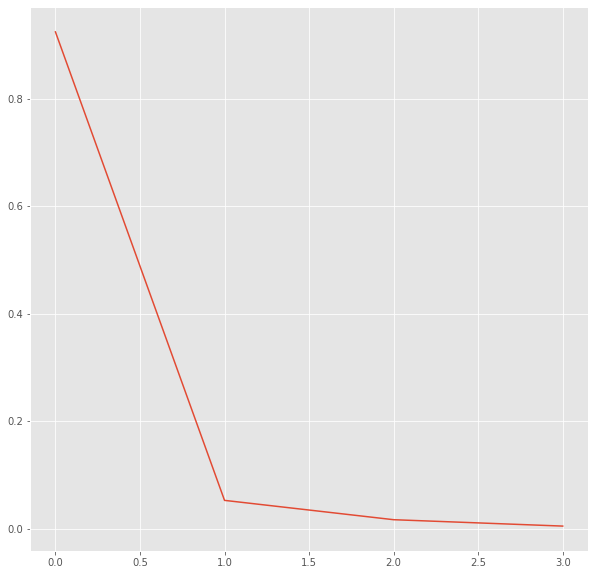

In [7]:
iris_pca, iris_vals, iris_vecs = pca(iris_d)
iris_vals = array([x/sum(iris_vals) for x in iris_vals])
plt.plot(iris_vals)

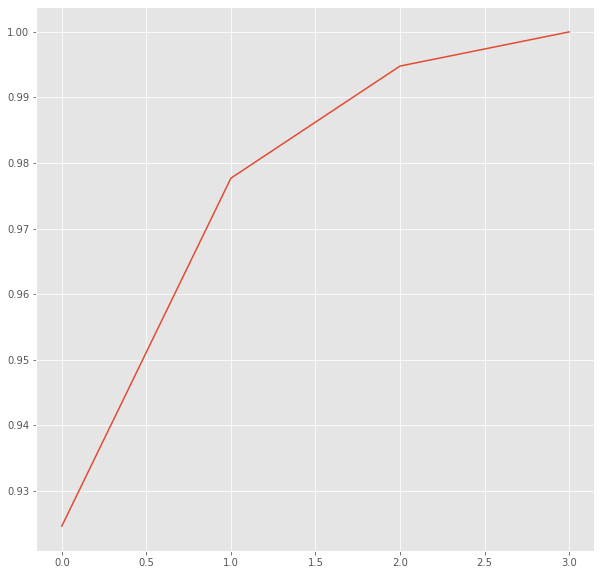

In [8]:
plt.plot(iris_vals.cumsum())

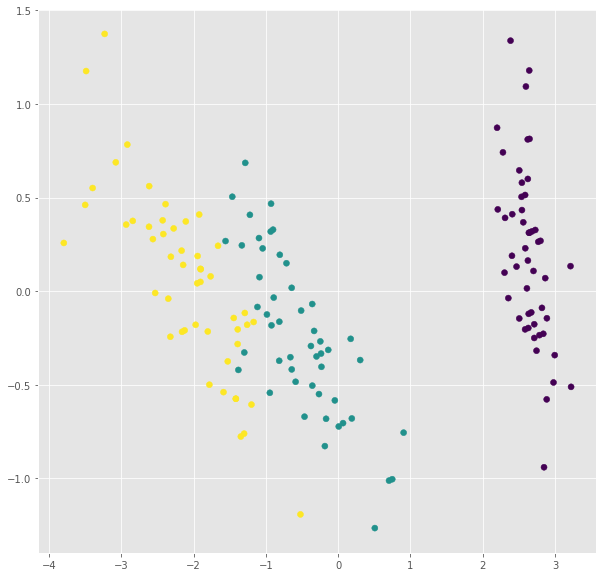

In [9]:
f, ax = plt.subplots(1,1)
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris_t)

## Cáncer

Conjunto de datos de cáncer de mama de la U. Wisconsin

In [10]:
print(breast_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
print(breast_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<Figure size 720x720 with 0 Axes>

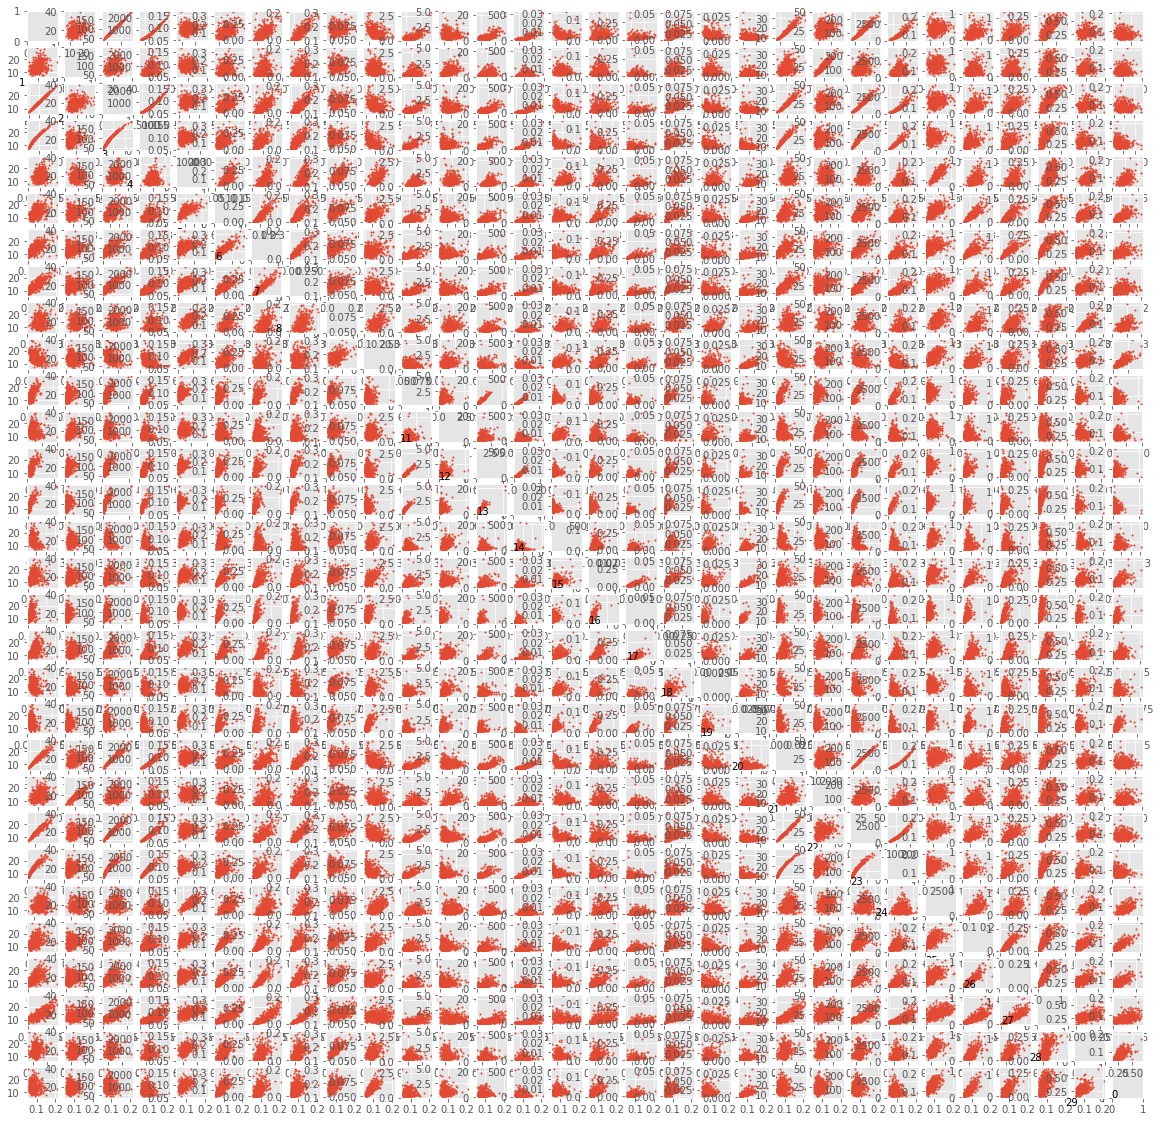

In [12]:
plt.clf()
k=30
f, ax = plt.subplots(k,k)
f.set_size_inches(20,20)
cuadro = 1
for i in range(k):
    for j in range(k):
        if(i==j):
            plt.text(0,0,"{}".format(i))
        else:
            plt.subplot(k,k,cuadro)
            plt.scatter(breast_d[:,i], breast_d[:,j], s=2, cmap='Dark2')
        cuadro += 1

In [13]:
breast_pca, breast_vals, breast_vecs = pca(breast_d)
breast_vals_n = array([x/sum(breast_vals) for x in breast_vals])

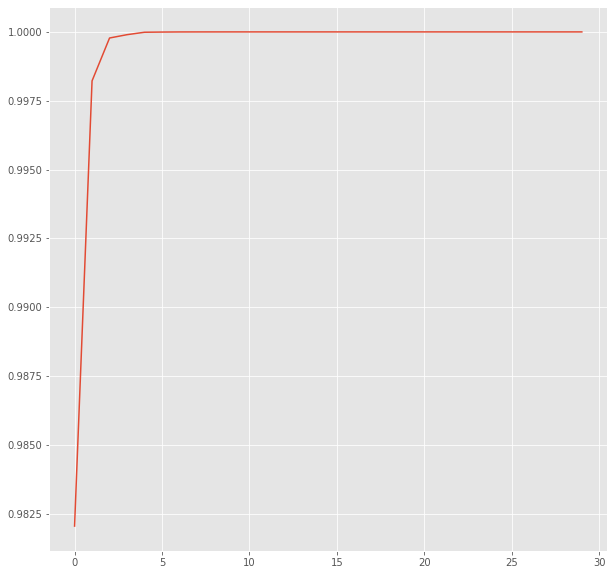

In [14]:
plt.plot(breast_vals_n.cumsum())

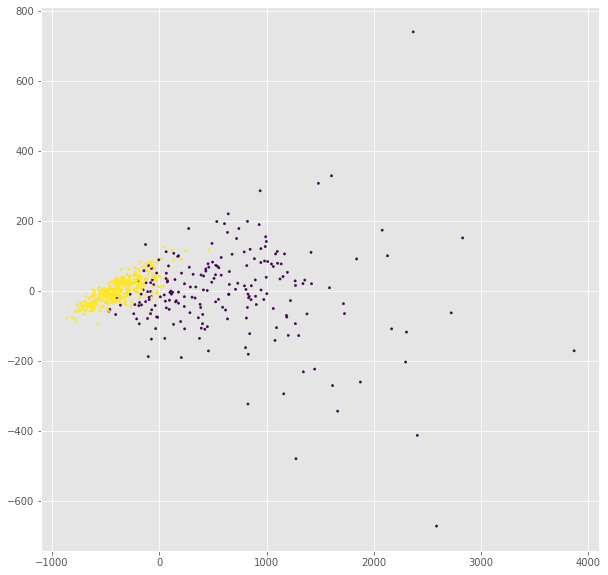

In [15]:
plt.scatter(breast_pca[:,0], breast_pca[:,1], s=5, c=breast_data.target)

## SVD

El método de Descomposición en Valores Singulares consiste en factorizar la matriz A en dos matrices ortonormales y una matriz diagonal

$$ A = U \Sigma V^T $$

La factorización de $A \in \mathcal{R}^{n\times m}$ se puede hacer:

$$A^T A = V \Sigma^T \Sigma V^T$$

y también 
$$A A^T = U \Sigma^T \Sigma U^T$$

de las cuales debemos sacar los eigenvalores y eigenvectores (a los primeros debemos sacarles la raíz cuadrada).

Para lograr esto hay que buscar la base que maximice la proyección de los puntos de $A$, es decir, buscar el espacio generador que maximice la proyección en una dirección y así subsecuentemente hasta cubrir todas las posibles dimensiones de l

In [16]:
def vector_unit(n):
    vec = np.random.randn(n,)
    tam = la.norm(vec)
    return array([x/tam for x in vec])

def svd_1d(A):
    n, m = A.shape
    x = vector_unit(m)
    uv = None
    av = x
    B = np.dot(A.T, A)
 
    i = 0
    while True:
        i += 1
        uv = av
        av = dot(B, uv)
        av /= la.norm(av)
        if(abs(dot(av,uv)) > 1 - 1e-5):
            return av

A = array([
    [2, 5, 3],
    [1, 2, 1],
    [4, 1, 1],
    [3, 5, 2],
    [5, 3, 1],
    [4, 5, 5],
    [2, 4, 2],
    [2, 2, 5],
])
print(A)

svd_1d(A)

[[2 5 3]
 [1 2 1]
 [4 1 1]
 [3 5 2]
 [5 3 1]
 [4 5 5]
 [2 4 2]
 [2 2 5]]


array([0.54188152, 0.67062357, 0.50658508])

El cálculo de el primer vector singular es sencillo. Empezamos con un vector aleatorio unitario $x_0$ y luego iteramos $$x_{t+1} = Bx_t$$ donde $B = A^T A$. El criterio de convergencia es que $x_t$ y $x_{t+1}$ sean iguales.

La factorización completa es esencialmente lo mismo. Calculamos el primer vector singular $v$ a partir de la matriz A, evitamos que se vuelva a calcular este vector restando $M-X$ y luego calculando el siguiente vector $u$ y normalizándolo.

In [17]:
def svd_power(A):
    """
    Resuelve SVD usando el método de iteración de potencias
    https://en.wikipedia.org/wiki/Power_iteration
    """
    n, m = A.shape
    UV = []
 
    for i in range(m):
        M = A.copy()
        for s, u, v in UV[:i]:
            X           = s * np.outer(u, v)
            Y           = M - X
            M = Y 
        v = svd_1d(M)        # vector singular
        un = dot(A, v)
        sigma = la.norm(un)  # valor singular
        u = un / sigma
        UV.append((sigma, u, v))     
    ss, us, vs = [np.array(x) for x in zip(*UV)]
 
    return ss, us.T, vs

factorizacion = svd_power(A)

In [18]:
factorizacion[0]

array([15.09626906,  4.30053299,  3.40706272])

In [19]:
factorizacion[1]

array([[ 0.39459477, -0.24094783,  0.35239528],
       [ 0.15830396, -0.03129418,  0.15272228],
       [ 0.22153281,  0.52303332, -0.38894864],
       [ 0.39692502,  0.08447692,  0.41121611],
       [ 0.34628053,  0.64181568, -0.06843069],
       [ 0.53348021, -0.19040454, -0.20114574],
       [ 0.31660791, -0.06258836,  0.30544456],
       [ 0.32841538, -0.45625219, -0.62743525]])

In [20]:
factorizacion[2]

array([[ 0.54175209,  0.67073656,  0.50657392],
       [ 0.7540907 , -0.1216316 , -0.64540915],
       [-0.37128412,  0.73165444, -0.57169038]])

In [24]:
from numpy.linalg  import svd
from matplotlib    import image
from skimage.io    import imread
from skimage.color import rgb2gray
dizzie= rgb2gray(imread('../dizzie2.jpeg'))

dizzie.shape

(810, 1242)

In [26]:
V, S, Ut = svd(dizzie, full_matrices=False)
print(V.shape)
print(S.shape)
print(Ut.shape)

(810, 810)
(810,)
(810, 1242)


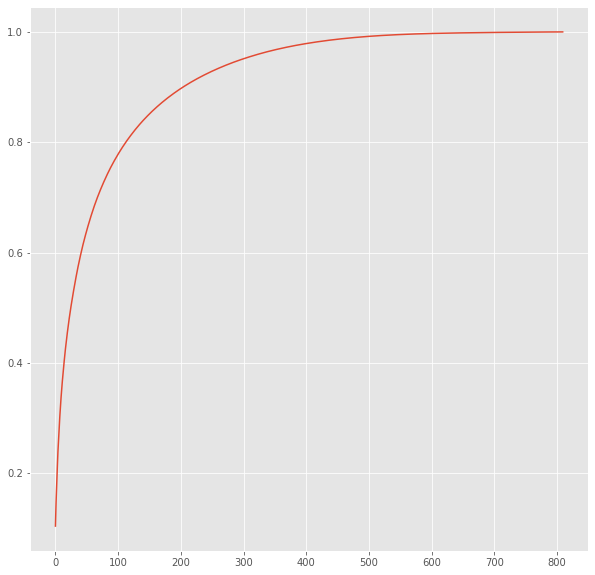

In [27]:
Sn = array([s/sum(S) for s in S])
plt.plot(Sn.cumsum())

In [38]:
reconstruye = lambda p,s,q,n : np.dot( np.dot(p[:,:n], np.diag(s[:n])), q[:n])

recomp = reconstruye(V,S,Ut,n=1242)
recomp.shape


(810, 1242)

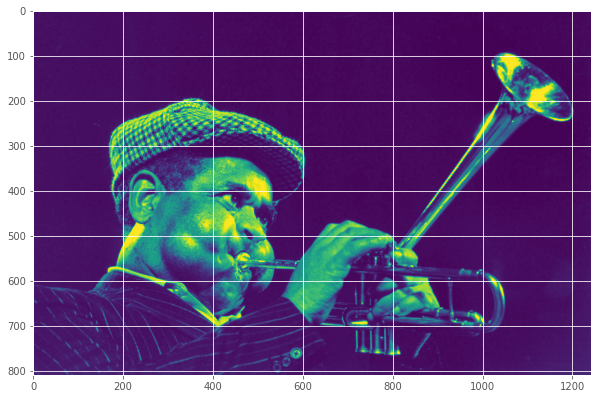

In [39]:
plt.imshow(recomp)

(810, 10)
(10,)
(10, 1242)


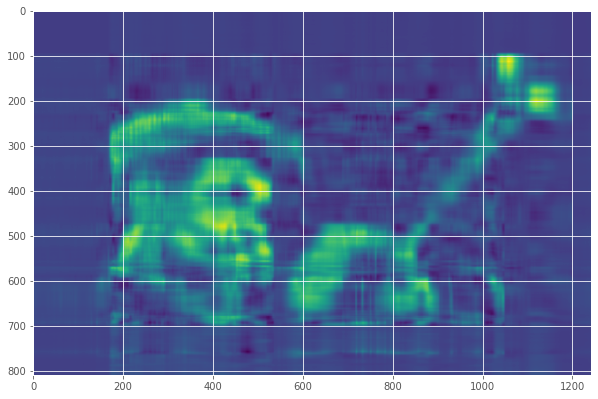

In [55]:
n = 10
vp, sp, up  = V[:,:n], S[:n], Ut[:n]
print(vp.shape)
print(sp.shape)
print(up.shape)
recons = reconstruye( vp, sp, up, n)
plt.imshow(recons)

## LSA

¿Cómo encontramos similitudes entre textos?

Supongan que quieren encontrar una oferta de trabajo relacinada con sus hablidades usando texto libre.

Cualidades: Programador, habla inglés, con experiencia en Java, Linux

Ofertas
1. Plomero con experiencia
1. Ingeniero en computación o ingeniero en sistemas con buen inglés
1. Programador o ingeniero en sistemas para bases de datos
1. Maestra de inglés

Si los tuvieramos en forma de vectores podríamos hacer una comparación objetiva. 

LSA permite hacer eso. El método pide que se quiten _stopwords_ y se haga lematización, así que supongamos que ya hicimos eso.

Lo que requerimos después es crear una _base de palabras_ para expresar nuestras ofertas como índices en esta base (BoW)

Nuestra base queda así

$$ {base, dato, computación, experiencia, inglés, ingenier, maestr, plomer, programador, sistema} $$

Entonces cada oferta se va a representar como un entero dependiendo de cuántas veces exista esa palabra en nuestra oferta:

1. Plomer, experiencia  $(0 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 0)$
1. Ingenier, computación, ingenier, sistema, inglés $(0 , 0 , 1 , 0 , 1 , 2 , 0 , 0 , 0 , 1)$
1. Maestr, inglés $(0 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 0)$
1. programador, ingenier sistemas, base dato $(1 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 1)$

Ya con esto podríamos saber cuál es el vector "más cercano" usando _cosine similarity_.

$$s(v,w) = cos(\theta) = \frac {v \cdot w} {||v|| \cdot ||w||}$$

In [36]:
def cossim(v,w):
    prod = np.dot(v,w)
    tamn = np.linalg.norm(v)*np.linalg.norm(w)
    return prod/tamn


Ponemos nuestros documentos en una matrix $X$

In [37]:
X = np.array([[ 0 , 0 , 0 , 1 ], 
              [ 0 , 0 , 0 , 1 ], 
              [ 0 , 1 , 0 , 0 ],
              [ 1 , 0 , 1 , 0 ], 
              [ 0 , 1 , 0 , 0 ], 
              [ 0 , 2 , 0 , 1 ],
              [ 0 , 0 , 0 , 0 ], 
              [ 1 , 0 , 1 , 0 ], 
              [ 0 , 0 , 0 , 1 ],
              [ 0 , 1 , 0 , 1 ]]) 

In [42]:
k=4
U,s,Vt = svd(X, full_matrices=False)
sigma = np.eye(len(Vt))*s

print("Dimensiones de U, S, Vt")
print(U.shape, sigma.shape, Vt.shape)

print("Valores singulares")
print(np.round(sigma, decimals=3))

print("Matriz filas")
print(U[:,:k].shape)

print("Matriz S diagonalizada")
print(sigma[:k,:k].shape)

print("Matriz de columnas ")
print(Vt[:,:k].shape)

Dimensiones de U, S, Vt
(10, 4) (4, 4) (4, 4)
Valores singulares
[[3.027 0.    0.    0.   ]
 [0.    2.    0.    0.   ]
 [0.    0.    1.685 0.   ]
 [0.    0.    0.    0.   ]]
Matriz filas
(10, 4)
Matriz S diagonalizada
(4, 4)
Matriz de columnas 
(4, 4)


Pero lo que nos permite SVD es reducir el número de dimensiones originales para reconstruir la matriz, degenerándola pero esto permite recuperar variables latentes que _acercan_ a los vectores entre sí.

In [44]:
k=2
#Xr = np.dot(np.dot(U[:,:k], sigma[:k, :k]),Vt[:k,:] )
Xr = reconstruye(U, s, Vt, k )
print(np.allclose(X,Xr))
print(np.round(Xr,decimals=2))

False
[[-0.    0.47 -0.    0.34]
 [ 0.    0.47  0.    0.34]
 [-0.    0.66 -0.    0.47]
 [ 1.   -0.    1.    0.  ]
 [-0.    0.66 -0.    0.47]
 [ 0.    1.79  0.    1.29]
 [ 0.    0.    0.    0.  ]
 [ 1.   -0.    1.    0.  ]
 [ 0.    0.47  0.    0.34]
 [ 0.    1.13  0.    0.82]]


Nuestras cualidades, o mejor dicho, el documento nuevo en forma vectorial

In [45]:
d  = np.array([[0, 0, 0, 1, 1, 0, 0, 0, 1, 0]])
print("Documento {0}".format(d))
print(d.shape)

Documento [[0 0 0 1 1 0 0 0 1 0]]
(1, 10)


Hacemos producto punto por la matriz degenerada para ver que tanto se parece a cada vector

In [46]:
dh = np.dot(d, Xr)
print(np.round(dh, decimals=2))

[[1.   1.13 1.   0.82]]


Recuperamos el índice del _score_ más alto

In [234]:
np.argsort(dh)

array([[3, 2, 0, 1]])

In [60]:
for i in range(4):
    x = X[:,i].reshape(1,-1)
    print(x.shape)
    print(cossim(x,d.T))

(1, 10)
[[0.40824829]]
(1, 10)
[[0.21821789]]
(1, 10)
[[0.40824829]]
(1, 10)
[[0.25819889]]
